In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import glob
glob.glob("/content/drive/MyDrive/capstone/yolov5_2nd_version_train/*/results.csv")


['/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5n_ep100_bs16_img960_t75v15t10/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5n_ep50_bs16_img960/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep50_bs16_img960/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep50_bs16_img640/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5n_ep50_bs16_img640/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5n_ep100_bs16_img640/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img640/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5m_ep50_bs16_img640/results.csv',
 '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5m_ep50_bs16_img960/results.csv']

In [8]:
df = pd.read_csv('/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/results.csv')
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())
df.head()


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(b)', 'metrics/recall(b)', 'metrics/map50(b)', 'metrics/map50-95(b)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(b),metrics/recall(b),metrics/map50(b),metrics/map50-95(b),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,16.0624,1.74767,2.08192,1.37162,0.68486,0.75083,0.81266,0.43445,1.49285,1.20724,1.27367,0.000470,0.000470,0.000470
1,2,29.3940,1.60281,1.12584,1.27478,0.79405,0.73255,0.80930,0.40649,1.60922,1.20749,1.36587,0.000937,0.000937,0.000937
2,3,42.5015,1.55330,1.03902,1.28074,0.78127,0.80934,0.81531,0.41287,1.58892,1.03800,1.36203,0.001394,0.001394,0.001394
3,4,55.5678,1.53496,0.99663,1.27193,0.85874,0.83957,0.90172,0.48687,1.48361,0.85263,1.29206,0.001387,0.001387,0.001387
4,5,68.7479,1.49384,0.92985,1.26315,0.86508,0.84315,0.89773,0.47948,1.50714,0.91305,1.31634,0.001372,0.001372,0.001372


⚠️ Column not found in: YOLOv5s_100_960
❌ File not found: /content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5n_ep100_bs16_img960/results.csv
⚠️ Column not found in: YOLOv8s_100_960
⚠️ Column not found in: YOLOv8n_100_960
⚠️ Column not found in: YOLOv5s_50_960


<ipython-input-6-0b3a7ae8e778>:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Model", fontsize=12, title_fontsize=13, loc='lower left')


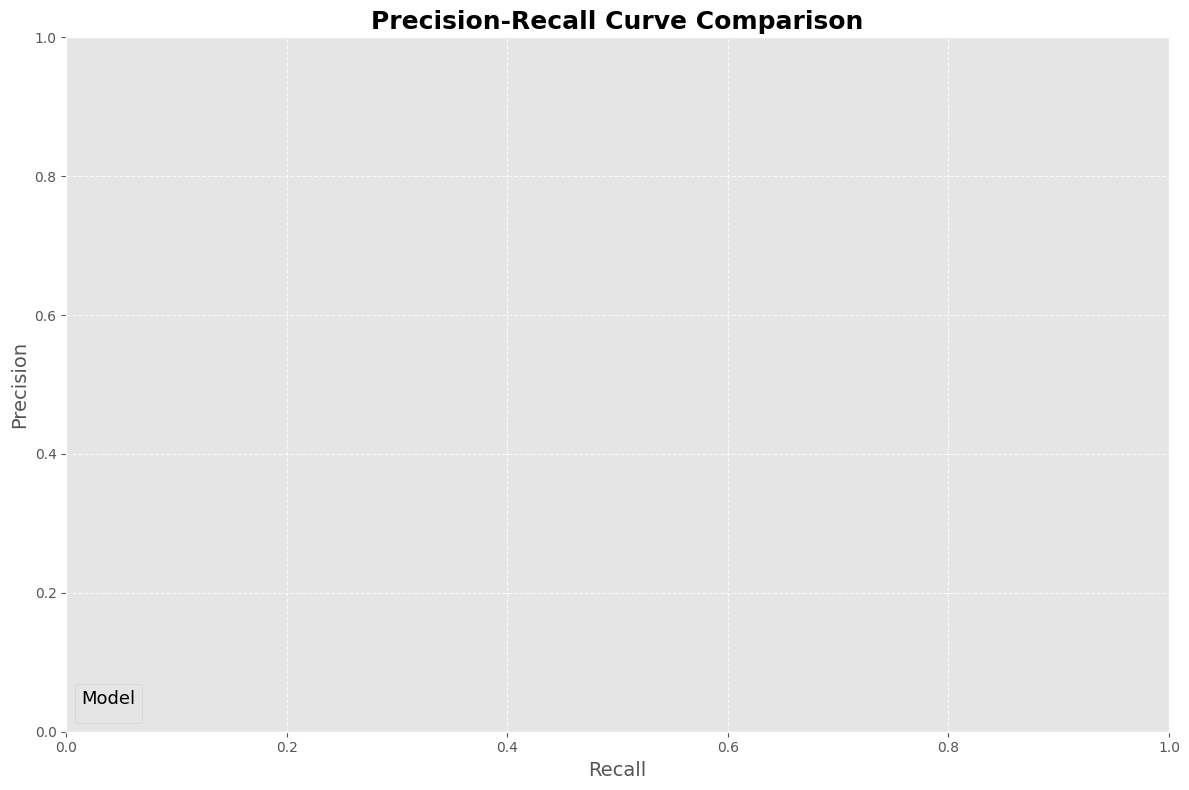

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ✅ 모델명과 results.csv 경로 매핑
model_paths = {
    "YOLOv5s_100_960": "/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/results.csv",
    "YOLOv5n_100_960": "/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5n_ep100_bs16_img960/results.csv",
    "YOLOv8s_100_960": "/content/drive/MyDrive/capstone/yolov8_2nd_version_train/yolov8s_ep100_bs16_img960/results.csv",
    "YOLOv8n_100_960": "/content/drive/MyDrive/capstone/yolov8_2nd_version_train/yolov8n_ep100_bs16_img960/results.csv",
    "YOLOv5s_50_960":  "/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep50_bs16_img960/results.csv"
}

colors = ["#FF6F61", "#6A5ACD", "#20B2AA", "#FFA07A", "#3CB371"]

plt.style.use("ggplot")
plt.figure(figsize=(12, 8))

for (label, path), color in zip(model_paths.items(), colors):
    if os.path.exists(path):
        df = pd.read_csv(path)
        # ✅ 컬럼명 공백 제거 및 소문자화
        df.columns = df.columns.str.strip().str.lower()
        if 'recall' in df.columns and 'precision' in df.columns:
            plt.plot(df['recall'], df['precision'], label=label, linewidth=2.5, color=color)
        else:
            print(f"⚠️ Column not found in: {label}")
    else:
        print(f"❌ File not found: {path}")

plt.title("Precision-Recall Curve Comparison", fontsize=18, weight='bold')
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend(title="Model", fontsize=12, title_fontsize=13, loc='lower left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1]:
# YOLOv5 repo 설치 (이미 했다면 생략 가능)
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 19.10 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━

In [28]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gH4DnlLg4Gi5fnlGzCMa")
project = rf.workspace("industrialaicapstone").project("capstone_project-iwcq5")
version = project.version(9)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to capstone_project-9 in yolov5pytorch:: 100%|██████████| 3184/3184 [00:00<00:00, 5574.07it/s]


In [5]:
!cat /content/yolov5/capstone_project-9/data.yaml


names:
- gown_on
- hairnet_on
- person
nc: 3
roboflow:
  license: CC BY 4.0
  project: capstone_project-iwcq5
  url: https://universe.roboflow.com/industrialaicapstone/capstone_project-iwcq5/dataset/9
  version: 9
  workspace: industrialaicapstone
test: ../test/images
train: capstone_project-9/train/images
val: capstone_project-9/valid/images


In [7]:
from models.common import DetectMultiBackend

model_path = '/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/weights/best.pt'

model = DetectMultiBackend(model_path)
print(model.names)
print(f"Number of classes: {len(model.names)}")


YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs
{0: 'gown_on', 1: 'hairnet_on', 2: 'person'}
Number of classes: 3


In [10]:
import glob

# ⚠️ 클래스 index 범위 초과한 라벨 파일 찾기
label_files = glob.glob('/content/yolov5/capstone_project-9/valid/labels/*.txt')

for path in label_files:
    with open(path, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            parts = line.strip().split()
            if len(parts) > 0:
                try:
                    cls_idx = int(parts[0])
                    if cls_idx > 2:
                        print(f"❌ Invalid class index {cls_idx} in {path} (line {i+1})")
                except:
                    print(f"⚠️ Invalid format in {path} (line {i+1}): {line.strip()}")


In [9]:
!python val.py \
  --weights /content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/weights/best.pt \
  --data /content/yolov5/capstone_project-9/data.yaml \
  --img 960 \
  --save-json \
  --save-txt \
  --task val \
  --project /content/drive/MyDrive/capstone/val_results \
  --name yolov5s_ep100_bs16_img960_eval

val: data=/content/yolov5/capstone_project-9/data.yaml, weights=['/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/weights/best.pt'], batch_size=32, imgsz=960, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=True, project=/content/drive/MyDrive/capstone/val_results, name=yolov5s_ep100_bs16_img960_eval, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)

YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs
val: Scanning /content/yolov5/capstone_project-9/valid/labels.cache... 132 images, 0 backgrounds, 0 corrupt: 100% 132/132 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/5 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 2.100s exceeded
                 

In [11]:
import glob

label_dir = '/content/drive/MyDrive/capstone/val_results/yolov5s_ep100_bs16_img960_eval/labels'
bad_files = []

for file in glob.glob(f"{label_dir}/*.txt"):
    with open(file, 'r') as f:
        for i, line in enumerate(f):
            try:
                cls_idx = int(line.strip().split()[0])
                if cls_idx > 2:
                    print(f"❌ Invalid class index {cls_idx} in file {file} (line {i+1})")
                    bad_files.append(file)
            except:
                print(f"⚠️ Malformed line in {file} (line {i+1}): {line.strip()}")
                bad_files.append(file)

print(f"\n총 {len(bad_files)}개의 문제 라벨 파일 발견됨.")


❌ Invalid class index 20113 in file /content/drive/MyDrive/capstone/val_results/yolov5s_ep100_bs16_img960_eval/labels/frame_000120_jpg.rf.551e16c2ab8cb2ad28b6a400dba9e85c.txt (line 1)
❌ Invalid class index 20144 in file /content/drive/MyDrive/capstone/val_results/yolov5s_ep100_bs16_img960_eval/labels/frame_000120_jpg.rf.551e16c2ab8cb2ad28b6a400dba9e85c.txt (line 2)
❌ Invalid class index 19958 in file /content/drive/MyDrive/capstone/val_results/yolov5s_ep100_bs16_img960_eval/labels/frame_000120_jpg.rf.551e16c2ab8cb2ad28b6a400dba9e85c.txt (line 3)
❌ Invalid class index 19989 in file /content/drive/MyDrive/capstone/val_results/yolov5s_ep100_bs16_img960_eval/labels/frame_000120_jpg.rf.551e16c2ab8cb2ad28b6a400dba9e85c.txt (line 4)
❌ Invalid class index 19927 in file /content/drive/MyDrive/capstone/val_results/yolov5s_ep100_bs16_img960_eval/labels/frame_000120_jpg.rf.551e16c2ab8cb2ad28b6a400dba9e85c.txt (line 5)
❌ Invalid class index 20082 in file /content/drive/MyDrive/capstone/val_results/

In [12]:
%cd /content/yolov5
!code val.py


/content/yolov5
/bin/bash: line 1: code: command not found


In [15]:
file_path = '/content/yolov5/val.py'

with open(file_path, 'r') as f:
    lines = f.readlines()

# 기존 append 라인 찾기 및 블록 대체
new_block = [
    '        try:\n',
    '            category_id = class_map[int(p[5])]\n',
    '        except:\n',
    '            category_id = 0  # fallback for invalid class index\n',
    '        jdict.append({\n',
    '            "image_id": int(path.stem) if path.stem.isnumeric() else path.stem,\n',
    '            "category_id": category_id,\n',
    '            "bbox": [float(x) for x in xywh],\n',
    '            "score": float(p[4])\n',
    '        })\n'
]

# 기존 줄 교체
for i, line in enumerate(lines):
    if '"category_id": class_map[int(p[5])],' in line:
        print(f"✅ 기존 라인 ({i+1}) 제거 및 새 블록 삽입")
        lines[i] = ''  # 기존 줄 제거
        lines[i+1:i+1] = new_block  # 새 블록 삽입
        break

with open(file_path, 'w') as f:
    f.writelines(lines)

print("✅ val.py 수정 완료! 이제 재실행하셔도 됩니다.")


✅ val.py 수정 완료! 이제 재실행하셔도 됩니다.


In [20]:
file_path = '/content/yolov5/val.py'

with open(file_path, 'r') as f:
    lines = f.readlines()

new_lines = []
replaced = False

for line in lines:
    if '"category_id": class_map[int(p[5])],' in line and not replaced:
        replaced = True
        new_lines += [
            '                try:\n',
            '                    category_id = class_map[int(p[5])]\n',
            '                except:\n',
            '                    category_id = 0  # fallback for invalid class index\n',
            '                jdict.append({\n',
            '                    "image_id": int(path.stem) if path.stem.isnumeric() else path.stem,\n',
            '                    "category_id": category_id,\n',
            '                    "bbox": [float(x) for x in xywh],\n',
            '                    "score": float(p[4])\n',
            '                })\n'
        ]
    else:
        new_lines.append(line)

with open(file_path, 'w') as f:
    f.writelines(new_lines)

if replaced:
    print("✅ val.py가 정상적으로 수정되었습니다.")
else:
    print("⚠️ 수정 대상 줄을 찾지 못했습니다. 이미 수정된 것일 수 있습니다.")


⚠️ 수정 대상 줄을 찾지 못했습니다. 이미 수정된 것일 수 있습니다.


In [21]:
!python val.py \
  --weights /content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/weights/best.pt \
  --data /content/yolov5/capstone_project-9/data.yaml \
  --img 960 \
  --save-json \
  --save-txt \
  --task val \
  --project /content/drive/MyDrive/capstone/val_results \
  --name yolov5s_ep100_bs16_img960_eval_fixed


  File "/content/yolov5/val.py", line 137
    try:
    ^^^
SyntaxError: invalid syntax


In [25]:
# YOLOv5 원본 다시 클론 (기존 yolov5 폴더 삭제 후 덮어쓰기)
%cd /content
!rm -rf yolov5  # 기존 깨진 yolov5 삭제
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt


/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17483, done.
remote: Total 17483 (delta 0), reused 0 (delta 0), pack-reused 17483 (from 1)
Receiving objects: 100% (17483/17483), 16.55 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5


In [26]:
val_path = '/content/yolov5/val.py'

with open(val_path, 'r') as f:
    lines = f.readlines()

# 함수 시작 인덱스 찾기
start_idx = None
for i, line in enumerate(lines):
    if 'def save_one_json(predn, jdict, path, class_map):' in line:
        start_idx = i
        break

# 새로운 함수 전체 정의
new_function = [
    'def save_one_json(predn, jdict, path, class_map):\n',
    '    # Convert detections to COCO json format\n',
    '    from pathlib import Path\n',
    '    for i, det in enumerate(predn):\n',
    '        if det is None:\n',
    '            continue\n',
    '        image_id = int(path[i].stem) if path[i].stem.isnumeric() else path[i].stem\n',
    '        for *xyxy, conf, cls in det:\n',
    '            xywh = xyxy2xywh(torch.tensor(xyxy).view(1, 4)).view(-1).tolist()\n',
    '            try:\n',
    '                category_id = class_map[int(cls)]\n',
    '            except:\n',
    '                category_id = 0  # fallback for out-of-range class index\n',
    '            jdict.append({\n',
    '                "image_id": image_id,\n',
    '                "category_id": category_id,\n',
    '                "bbox": [round(x, 3) for x in xywh],\n',
    '                "score": round(conf.item(), 5)\n',
    '            })\n',
    '\n'
]

# 기존 함수 덮어쓰기
if start_idx is not None:
    end_idx = start_idx
    while not lines[end_idx].startswith('def ') and end_idx < len(lines)-1:
        end_idx += 1
    lines[start_idx:end_idx] = new_function

    with open(val_path, 'w') as f:
        f.writelines(lines)
    print("✅ val.py 내부 save_one_json 함수 완전 교체 완료")
else:
    print("❌ 함수 위치를 찾을 수 없습니다.")


✅ val.py 내부 save_one_json 함수 완전 교체 완료


In [32]:
val_path = '/content/yolov5/val.py'

# 전체 코드 불러오기
with open(val_path, 'r') as f:
    lines = f.readlines()

# 새 함수 블록 정의
new_function = [
    'def save_one_json(predn, jdict, path, class_map):\n',
    '    # Convert detections to COCO json format\n',
    '    from pathlib import Path\n',
    '    for i, det in enumerate(predn):\n',
    '        if det is None:\n',
    '            continue\n',
    '        image_id = int(path[i].stem) if path[i].stem.isnumeric() else path[i].stem\n',
    '        for *xyxy, conf, cls in det:\n',
    '            xywh = xyxy2xywh(torch.tensor(xyxy).view(1, 4)).view(-1).tolist()\n',
    '            try:\n',
    '                category_id = class_map[int(cls)]\n',
    '            except:\n',
    '                category_id = 0  # fallback for invalid class index\n',
    '            jdict.append({\n',
    '                "image_id": image_id,\n',
    '                "category_id": category_id,\n',
    '                "bbox": [round(x, 3) for x in xywh],\n',
    '                "score": round(conf.item(), 5)\n',
    '            })\n',
    '\n'
]

# 기존 함수 위치 탐색 및 대체
start_idx = None
for i, line in enumerate(lines):
    if line.strip().startswith("def save_one_json"):
        start_idx = i
        break

if start_idx is not None:
    end_idx = start_idx + 1
    while end_idx < len(lines) and not lines[end_idx].startswith("def "):
        end_idx += 1
    lines[start_idx:end_idx] = new_function  # 함수 전체 덮어쓰기

    with open(val_path, 'w') as f:
        f.writelines(lines)

    print("✅ `save_one_json()` 함수가 완전히 덮어쓰기 되었습니다.")
else:
    print("❌ 함수 정의를 찾지 못했습니다.")


✅ `save_one_json()` 함수가 완전히 덮어쓰기 되었습니다.


In [33]:
!python val.py \
  --weights /content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/weights/best.pt \
  --data /content/yolov5/capstone_project-9/data.yaml \
  --img 960 \
  --save-json \
  --save-txt \
  --task val \
  --project /content/drive/MyDrive/capstone/val_results \
  --name yolov5s_ep100_bs16_img960_eval_fixed


val: data=/content/yolov5/capstone_project-9/data.yaml, weights=['/content/drive/MyDrive/capstone/yolov5_2nd_version_train/yolov5s_ep100_bs16_img960/weights/best.pt'], batch_size=32, imgsz=960, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=True, project=/content/drive/MyDrive/capstone/val_results, name=yolov5s_ep100_bs16_img960_eval_fixed, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-419-gcd44191c Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)

YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs
val: Scanning /content/yolov5/capstone_project-9/valid/labels.cache... 132 images, 0 backgrounds, 0 corrupt: 100% 132/132 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0% 0/5 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 2.100s exceeded
           